In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
sx = qt.sigmax();sy = qt.sigmay(); sz = qt.sigmaz(); s0 = qt.qeye(2); sm = qt.sigmam(); sp = qt.sigmap()

In [78]:



class rlc_ode():
    def __init__(self, R, L, C, wd, Ad, dt = None):   
        self.R = R
        self.L = L
        self.C = C
        self.wd = wd
        self.Ad = Ad
        self.dt = dt
    


    def fdx(self, x, t):
        Vt = self.Ad*np.exp(1.j*self.wd*t)
        return np.array([x[1], -self.R/self.L*x[1] -x[0]/self.L*self.C + Vt/self.L*self.C ])


    def RK4_step(self, x, t):
        l1 = self.fdx(x, t)
        l2 = self.fdx(x + l1 * self.dt / 2, t +self.dt/2)
        l3 = self.fdx(x+ l2 * self.dt / 2, t+self.dt/2)
        l4 = self.fdx(x + l3 * self.dt, t)

        return x + self.dt * (l1 + 2 * l2 + 2 * l3 + l4) / 6, t

    def solve_ode(self, x0, times):
        v = np.zeros(len(times), dtype=complex)
        dv = np.zeros(len(times), dtype=complex)
        self.dt = times[1]-times[0]
        v[0] = x0[0]
        dv[0] = x0[1]
        x = x0
        for n,t in enumerate(times[:-1]):
            x,t0  = self.RK4_step(x, t)
            v[n+1] = x[0]
            dv[n+1] = x[1]
        return v,dv

    #def get_reflection(self, vin, vout):
   #    return vout/vin
    

In [79]:
rlc = rlc_ode(R=0.5, L=1, C=1, wd=1, Ad=1)

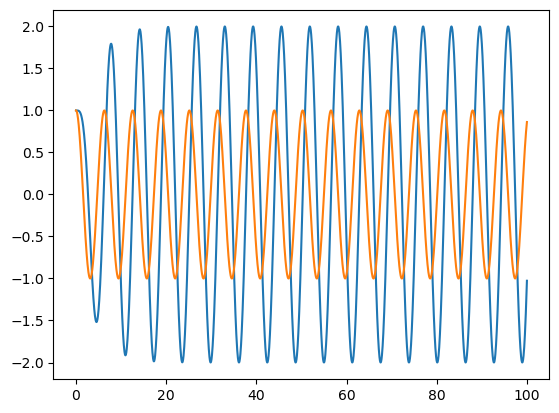

In [83]:
times = np.linspace(0,100,2001)
v,dv = rlc.solve_ode([1,0], times)
#gam = rlc.get_reflection(rlc.Ad*np.exp(1j*rlc.wd*times), v)
plt.plot(times, np.real(v))
plt.plot(times, rlc.Ad*np.cos(rlc.wd*times))

In [ ]:

def next_OU_step(x, tc, sig, dt):
    n = np.random.normal(0,1)
    return x*(np.exp(-dt/tc)) + +np.sqrt(1-np.exp(-2*dt/tc))*sig*n

def OU_process(x0, tau, sig, tc, n_steps):
    x = np.zeros(n_steps)
    x[0] = x0
    for i in range(1, n_steps):
        x[i] = next_OU_step(x[i-1], tau, sig, tc)
    return x